
#Assignment No 7
######*Sibt ul Hussain*
----
##Goal

Your goal in this assigment is to implement a multi-class Neural network Classifier. 

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

##Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

##Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Cutomize the Matplotlib for beautiful plots...
#comment it if it does not work for you.
# import dmStyle
# dmStyle.customize_mpl()


In [3]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time
import math
import numpy as np

###Neural Network
Given a set of $m$ $d$-dimensional labelled training examples $X$ and their labels $Y $($Y \in \{1, 2, 3,\dots, k\})$.

Your goal in this assignment is to implement multi-class Neural NeTwork classifier. Specifically, we will be implementing a three-layer neural network. We will be using $1-in-k$ class representation and will be using $k$ output neurons for $k$ different classes. During training we will be representing each example's class label with a binary vector of $k$ dimensions with $j_th$ dimension to which example example will be set to 1. For instance, if an example has a label$=4$ and total number of classes are 6 then it's label during training will be represented by the vector =$[0,0,0,1,0,0]$

We will be using following cost function to measure the effectiveness of our learned system.  In other words, in Neural Network we try to optimize (minimize) following cost function (without regularization) to find the optimal decision boundary :


$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{j=1}^{k} \lbrack -y_j^{(i)} \log(a^{(3)}_k(x^{(i)})) - (1-y_j^{(i)}) \log(1-a^{(3)}_k(x^{(i)})) \rbrack$$

Here $a^{(3)}_k$ is the $k_{th}$ neuron of 3rd layer of neural network. Recall that this cost function is identical to the cost function we have seen in the multi-class logistic regression, except here the cost function uses the output layer neurons instead of the usual single sigmoid function.

This also implies that we will be using the last layer neurons output as our hypotheses, and during testing the label of the hypothesis that gives highest score to a test example will be used as label of the test example.

To find the best set of parameters we will be using a gradient descent or stochastic gradient descent. For that to work, we will need to compute the derivatives of our cost function w.r.t to our parameter $\theta$'s$.

Now recall from your class that, derivatives for a single example will be:

$$
\begin{align}
\frac{\partial}{\partial \theta_{11}^{(2)}} J(W,b) &=\underbrace{\frac{1}{m}\left([ a^3_1(1-a^3_1)]\frac{(a^3_1-y_1)}{a^3(1-a^3_1)}\right)}_{\delta^{3}_1} a^{(2)}_1
 = \delta^{3}_1 a^{(2)}_1
\end{align}
$$
Similary

$$
\begin{align}
\frac{\partial}{\partial \theta_{12}^{(2)}} J(W,b) = \delta^{3}_1 a^{(2)}_2
\end{align}
$$

Thus the partial derivatives of the output layer can be written in a matrix-vector prodcut, i.e.
$$\begin{align}
\frac{\partial}{\partial \theta^{(2)}} J(W,b) = \delta^{3} * a^{(2)T}
\end{align}$$

Where $ \delta^{3}=\frac{1}{m} (a^3-y)$

Recall that we can similarly write the partial derivatives of first layer, i.e.
$$\begin{align}
\frac{\partial}{\partial \theta^{(1)}} J(W,b) = \delta^{2} * X^{T} \mbox{ ; You can substitue X with $a^1$ as well.}
\end{align}$$

Where $ \delta^{2}=\theta^{(2)T}*\delta^3 .* (a^2*(1-a^2))$. Here '$.*$' means element-wise multiplication and '$*$' means matrix-vector prodcut.

##Summary of Algorithm:

 - *Forward Pass:* In the forward pass you will compute the $a$'s, using following expressions:
     $a^2=\theta^1 * X$ and $a^3=\theta^2 * a^2$
 - *BackWard Pass:* In the backward pass you will compute the deltas and using those deltas you will find the derivatives of the cost function.
 
![Derivation of the gradients](Hand-Written-nn.jpg "Summary of the derivation")

*Remember to exclude the bias-term during the calculations of derivatives of $\theta^1$

In [4]:
def GradientDescent(X,Y,cost_function,derivative_cost_function,nparams,maxniter=20000, alpha=0.01, plotcf=True):
    
    eps = 0.00001
    alpha = 0.01
    
    nexamples = float(X.shape[0])
    thetas = np.random.rand(nparams, 1)
#     thetas = thetas*2 - 1
    
    numiter = 0
    
    stime = time.time()
    theta_old = thetas
    theta_new = thetas + 1
    
#     pdb.set_trace()
#     print thetas.shape,theta_old.shape,theta_new.shape
#     cf = cost_function(X,Y,theta_old)
#     pai=int(maxniter / 200) # plot in total 200 number of points
#     print cf
    
    df = 1
    while numiter < maxniter and np.linalg.norm(df) > eps:
        theta_old = theta_new
        df = derivative_cost_function(X,Y,theta_old)
        theta_new -= alpha * df
        
        numiter += 1
        
    print "numiter : ", numiter
    cf = cost_function(X, Y, theta_new)
    print 'Value of Cost Function at Minimum Points {}, is {}'.format(theta_new, cf)
    print 'Total time taken ={:.4} seconds '.format(time.time()-stime) # difference between current and stored time
    return theta_new


In [5]:
import pdb
def one_of_k(ilabels):
    """
        Computes one of k representation for the given labels
        
        Input:
            ilabels: class labels (m x 1)
        
        output:
             
            olabels: one of k representation of 
    """
    classes=np.unique(ilabels)
    nclasses=len(classes)
    olabels=np.zeros((ilabels.shape[0],nclasses))
    
    for i, l in enumerate(ilabels):        
        olabels[i, classes == l] = 1
    return olabels

**Warning: In this assignment we will be assuming our data-matrix X to be $d \times m$ instead of $m\times d$, similary our Y will be $k\times m$ instead of $m \times k$, since that's how we derived our derivatives in the class.**

In [6]:
# A placeholder class 
# TODO: You have to implement the following class

### import pdb
## Your code goes here...
# You might need to define auxliary classes for composition.. ?

class NeuralNetwork:
    ''' Implements the multiclass Neural Network For Classification... 

        It is  a simple implementation of 3 Layer NeuralNetwork, for learning purpose,
        you can extend it to multi-layer with some simple modifications....
        
    '''
    
    def __init__(self,ifeatdim,nnhlayer,classes,alpha=0.001,maxniter=20000,scalefeatures=False):        
        self.thetas=[] # learned set of parameters
        self.scalefeatures=scalefeatures
        self.classes=np.unique(classes)

        self.nclasses=len(self.classes) # dimensions of output
        self.ifeatdim=ifeatdim # dimension of input features,
        self.nnhlayer=nnhlayer # number of neurons in hidden layer
        
        self.maxniter=maxniter
        self.alpha=alpha

        self.sl1theta= (nnhlayer, ifeatdim) # l1theta's shape, remember 1 is already added for bias terms
        self.sl2theta= (self.nclasses, nnhlayer+1) # l2thetas's shape, +1 for bias terms

        # thetas's for neurons + bias terms..
        
        self.nthetas= (self.nclasses * nnhlayer + nnhlayer* self.ifeatdim) + (self.nclasses)
        
        assert(self.nthetas == np.product(self.sl1theta[:])+np.product(self.sl2theta[:])) # for debugging 

        pass
    
    def getnparam(self):
        """
            returns number of parameters in the network...
        """
        return self.nthetas
    
    def unroll_thetas(self,thetas):
        """
            unroll (unpacks) a long vector of thetas to respective layer thetas...
            we will be using a long vector of thetas during Gradient Descent but
            during forward_pass and back_ward pass we will unpack this theta into 
            thetas of respective layers
            
            Input:
            --------
                a long vector of self.nthetas dimensions
            Output:
                a tuple with first element contains the thetas of first layer
                and second element contains the thetas of second layer.
        """

        l1theta = thetas[:np.product(self.sl1theta)].reshape(self.sl1theta)
        l2theta = thetas[np.product(self.sl1theta):].reshape(self.sl2theta)
        return l1theta, l2theta

    def roll_thetas(self,l1theta,l2theta):
        """
            Rolls (packs) the layer-wise thetas to a single long vector of thetas...

            Input:
            --------
                l1theta: thetas of layer-1
                l2theta: thetas of layer-2

            Output:
                a long vector of thetas containing both layers thetas
        """
        return np.concatenate((l1theta.ravel(), l2theta.ravel()))

    def forward_pass(self, X, thetas):
        """
            Compute the forward_pass across the layers...
            Input:
            X: training matrix (d X m)
            thetas: a long vector of thetas
        """
#         pdb.set_trace()
        
        l1theta, l2theta = self.unroll_thetas(thetas) # unroll the thetas...
                
        a2 = l1theta.dot(X)
        a2 = np.vstack((a2, np.ones((1, a2.shape[1]))))
        a2 = self.sigmoid(a2)
        a3 = l2theta.dot(a2)
        a3 = self.sigmoid(a3)
        
        return a2, a3
    
    def sigmoid(self,z):
        """
            Compute the sigmoid function 
            Input:
                z can be a scalar or a matrix
            Returns:
                sigmoid of the input variable z
        """
        z = maximum(minimum(16,z),-16) 
        return 1/(1+np.exp(-z))        
    
    def hypothesis(self, X,thetas):
        '''
            Computes the hypothesis for  given input examples (X) and parameters (thetas).

            Input:
                X: can be either a single d X n-dimensional vector or d X n dimensional matrix
                thetas: Must be a d-dimensional vector
            Return:
                The computed hypothesis
        '''
        return (self.forward_pass(X, thetas))[1]
    
    def cost_function(self, X,Y, thetas):
        '''
            Computes the Cost function for given input data (X) and labels (Y).

            Input:
                X: can be either a single d X n-dimensional vector or d X n dimensional matrix of inputs
                theata: must  dk X 1-dimensional vector for representing vectors of k classes
                Y: Must be k X n-dimensional label vector
                
            Return:
                Returns the cost of hypothesis with input parameters 
        '''
        m = X.shape[1]
        hyp = self.hypothesis(X, thetas)
        
#         pdb.set_trace()

        # ----- PRINTNG
#         print "hyp.shape : ", hyp.shape
#         print "Y.shape : ", Y.shape
#         print "1- np.log(hyp) : ", np.log(hyp)
#         print "2- np.multiply(Y, np.log(hyp)) : ", np.multiply(Y, np.log(hyp))
#         print "2- np.multiply(-1, np.multiply(Y, np.log(hyp))) : ", np.multiply(-1, np.multiply(Y, np.log(hyp)))
#         print "1- np.subtract(1, hyp) : ", np.subtract(1, hyp)
#         print "2- np.log(np.subtract(1, hyp)) : ", np.log(np.subtract(1, hyp))
#         print "2- np.subtract(1, Y) : ", np.subtract(1, Y)
#         print "3- np.multiply(np.subtract(1, Y), np.log(np.subtract(1, hyp))) : ", np.multiply(np.subtract(1, Y), np.log(np.subtract(1, hyp)))
#         print "4- np.subtract(np.multiply(-1, np.multiply(Y, np.log(hyp))), np.multiply(np.subtract(1, Y), np.log(np.subtract(1, hyp)))) : ", np.subtract(np.multiply(-1, np.multiply(Y, np.log(hyp))), np.multiply(np.subtract(1, Y), np.log(np.subtract(1, hyp))))
#         print "5- np.sum(print- 4) : ", np.sum(np.subtract(np.multiply(-1, np.multiply(Y, np.log(hyp))), np.multiply(np.subtract(1, Y), np.log(np.subtract(1, hyp)))))
#         print "6- np.divide(print- 5) : ", np.divide(np.sum(np.subtract(np.multiply(-1, np.multiply(Y, np.log(hyp))), np.multiply(np.subtract(1, Y), np.log(np.subtract(1, hyp))))), m)
        
        cost = np.divide(np.sum(np.subtract(np.multiply(-1, np.multiply(Y, np.log(hyp))),
                                np.multiply(np.subtract(1, Y), np.log(np.subtract(1, hyp))))), m)
        return cost
    
    def derivative_cost_function(self,X,Y,thetas):
        '''
            Computes the derivates of Cost function w.r.t input parameters (thetas)  
            for given input and labels.

            Input:
            ------
                X: can be either a single d X n-dimensional vector or d X n dimensional matrix of inputs
                theata: must  dk X 1-dimensional vector for representing vectors of k classes
                Y: Must be k X n-dimensional label vector
            Returns:
            ------
                partial_thetas: a dk X 1-dimensional vector of partial derivatives of cost function w.r.t parameters..
        '''
        
#         pdb.set_trace()
        
        a2, a3 = self.forward_pass(X, thetas)
        
        #now back-propogate 

        # unroll thetas
        l1theta, l2theta = self.unroll_thetas(thetas) # unroll the thetas...
        nexamples = float(X.shape[1])
        
        # compute del_3, l2theta
        del_3 = (a3 - Y)
        del_3 /= nexamples
        der_theta_2 = (del_3.dot(a2.T))
        
        #remember to exclude last element of delta2, representing the deltas of bias terms...
        # i.e. del_2 = del_2[:-1]
        
        # compute del_2, l1 theta
        del_2 = np.multiply(((l2theta.T).dot(del_3)), np.multiply(a2, (1 - a2)))
        del_2 = del_2[:-1]
        der_theta_1 = del_2.dot(X.T)
      
        l1theta = der_theta_2
        l2theta = der_theta_1

        # roll thetas into a big vector
        thetas = (self.roll_thetas(l2theta, l1theta)).reshape(thetas.shape) # return the same shape as you received
        return thetas
    
    def train(self, X, Y):
        ''' Train LogisticRegression classifier using the given 
            X [d x m] data matrix and Y labels matrix
            
            Input:
            ------
            X: [d x m] a data matrix of m d-dimensional examples.
            Y: [k x m] a label vector.
            
            Returns:
            -----------
            Nothing
        '''
        nfeatures, nexamples = X.shape

        if self.scalefeatures:
            X = self.scale_features(X)
        nY = one_of_k(Y.T)
        
        nparams = self.getnparam()
        print 'Calling Gradient Descent with following number of parameter={}'.format(nparams)
        self.thetas = GradientDescent(X, nY.T, self.cost_function, self.derivative_cost_function, self.getnparam(), self.maxniter, self.alpha)

    def predict(self, X):
        
        """
        Test the trained NeuralNetwork classifier result on the given examples X
        
            Input:
            ------
            X: [d x m] a matrix of m  d-dimensional test examples.
           
            Returns:
            -----------
            pclass: the predicted class for the given set of examples, i.e. to which it belongs
        """
        
        num_test = X.shape[1]
        
        if self.sl1theta[1]-X.shape[0] == 1:
            X=np.vstack((X,np.ones((1,X.shape[1]))))
        
        if self.scalefeatures:
            X=(X-self.xmin)/(self.xmax-self.xmin)
    
        hyp = self.hypothesis(X, self.thetas)
        pos = np.argmax(hyp, axis=0)
        Ypred = self.classes[pos]
        
        return np.array(Ypred).reshape((X.shape[1], 1))
    
    
    def scale_features(self,X):
        """
            Normalize each feature to lie in the range [0 ,1]

            Input:
            ------

                X= d x M dimensional data matrix

            Returns:
            --------

                normalized X
        """
        self.xmin= np.min(X,axis=1)
        self.xmax= np.max(X,axis=1)

        return (X-self.xmin)/(self.xmax-self.xmin)

#Non-Linear Binary Class Problem...

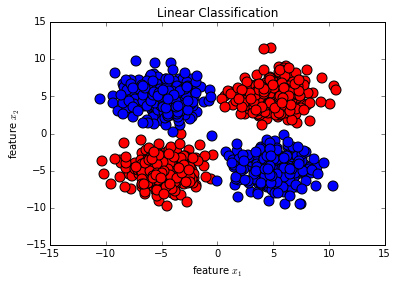

In [7]:
# Create some dummy data for testing

np.random.seed(seed=99)

# make some data up
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points
nexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,nexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples/4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples/4,1)),1*np.ones((nexamples/4,1)),2*np.ones((nexamples/4,1)),2*np.ones((nexamples/4,1))))

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='r', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='b', s=100)            



plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class-nn.svg',format='svg')

In [8]:
print X.shape,Y.shape

(1000L, 2L) (1000L, 1L)


In [9]:
#Lets append a vector of dummy 1's at the end of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [10]:
print X.shape,Y.shape

(1000L, 3L) (1000L, 1L)


In [11]:
# print "X : {}", X
# print "Y : {}", Y

In [12]:
ook=one_of_k(Y)

In [13]:
ook

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [14]:
#
def test_derivative(X,Y,cost_function,derivative_cost_function,nparams):
    """
        Function test the implementation of the derivative function...
        X: Input test examples (m x d)
        Y: True labels (m x 1)
        cost_function: function used to compute cost function...
        derivative_cost_function: function used to compute derivative of the cost function...
        nparams: number of parameters in the network...
    """
    thetas=np.random.rand(nparams, 1)
    ad=derivative_cost_function(X, Y, thetas)
    print ad
    eps=0.0001
    cd=[]

    for i in range(len(thetas)):
        ttpe=thetas.copy()
        ttpe[i]=ttpe[i]+eps # add an epsilon for the current theta
        ttme=thetas.copy()
        ttme[i]=ttme[i]-eps # add an epsilon for the current theta
#         print 'diff in direction', ttpe-ttme    
        cd.append((cost_function(X,Y,ttpe)-cost_function(X,Y,ttme))/(2*eps))

    print 'Computational derivatvie =',cd
    print 'Analytical derivative =', ad.shape,ad.T
    print 'Their difference=',np.reshape(cd,ad.shape)-ad

In [15]:
# %pdb off
nnclass=NeuralNetwork(3,2,[1, 2],alpha=0.01)

In [16]:
print "Shape of Parameters in L1 of ={}".format(nnclass.sl1theta)
print "Shape of Parameters in L2 of ={}".format(nnclass.sl2theta)
print "Number of Parameters in Network ={}".format(nnclass.getnparam())

Shape of Parameters in L1 of =(2, 3)
Shape of Parameters in L2 of =(2, 3)
Number of Parameters in Network =12


In [17]:
print ook.shape

(1000L, 2L)


In [18]:
# %reset
# we will be sending transpose of the elements to make sure the data is presented in d X m format
# %pdb off
test_derivative(X.T,ook.T,nnclass.cost_function,nnclass.derivative_cost_function,nnclass.getnparam())

# [[ 0.00868979]
#  [-0.00801636]
#  [ 0.04442738]
#  [ 0.00746731]
#  [-0.00382147]
#  [-0.00656223]
#  [ 0.12780143]
#  [ 0.12424418]
#  [ 0.15335027]
#  [ 0.18758114]
#  [ 0.1916021 ]
#  [ 0.31430696]]
# Computational derivatvie = [0.0086897912354721996, -0.008016364051455227, 0.044427379838340997, 0.0074673093342081387, -0.0038214655684321031, -0.0065622285971844718, 0.12780142988333409, 0.12424417613066119, 0.15335027439999926, 0.18758113909389529, 0.19160210020463531, 0.31430695763168259]
# Analytical derivative = (12, 1) [[ 0.00868979 -0.00801636  0.04442738  0.00746731 -0.00382147 -0.00656223
#    0.12780143  0.12424418  0.15335027  0.18758114  0.1916021   0.31430696]]
# Their difference= [[  2.92508866e-10]
#  [  4.53143065e-10]
#  [ -2.13270443e-11]
#  [ -1.14273486e-10]
#  [  5.30669996e-11]
#  [  7.08609300e-12]
#  [ -5.63925018e-11]
#  [ -6.50259013e-11]
#  [ -1.03662856e-10]
#  [ -2.71714318e-11]
#  [ -5.12551945e-11]
#  [ -1.46237800e-10]]

[[ 0.0109557 ]
 [-0.00855997]
 [ 0.04195059]
 [ 0.00919594]
 [-0.00442803]
 [-0.00870932]
 [ 0.12370253]
 [ 0.12021732]
 [ 0.10593335]
 [ 0.17474439]
 [ 0.17950515]
 [ 0.20581391]]
Computational derivatvie = [0.010955699470960312, -0.0085599741295183662, 0.041950587714723042, 0.0091959372394700978, -0.0044280295063980901, -0.0087093238021473951, 0.12370252566507034, 0.12021731965905502, 0.10593335381670066, 0.17474439109044226, 0.17950515475151363, 0.20581390566376534]
Analytical derivative = (12L, 1L) [[ 0.0109557  -0.00855997  0.04195059  0.00919594 -0.00442803 -0.00870932
   0.12370253  0.12021732  0.10593335  0.17474439  0.17950515  0.20581391]]
Their difference= [[  2.56466667e-10]
 [  4.22529248e-10]
 [ -1.64139605e-11]
 [ -1.21067937e-10]
 [  7.66825041e-11]
 [  4.33595521e-12]
 [ -5.76085568e-11]
 [ -6.06059647e-11]
 [ -4.03970885e-11]
 [ -5.12887510e-11]
 [ -5.33249556e-11]
 [ -5.11884701e-11]]


In [20]:
# %pdb
#once again sending the transpose of the training and testing matrix
nnclass.train(X.T,Y.T) # c

# Calling Gradient Descent with following number of parameter=12
# > <ipython-input-4-fc622e28c172>(39)GradientDescent()
# -> print thetas.shape,theta_old.shape,theta_new.shape
# (Pdb) c
# (12, 1) (12, 1) (12, 1)
# Iteration=0/20000(0.0%), Cost Function Value=1.4124500918 
# Iteration=500/20000(0.025%), Cost Function Value=1.39966674074 
# Iteration=1000/20000(0.05%), Cost Function Value=1.39369126031 
# Iteration=1500/20000(0.075%), Cost Function Value=1.38534202718 
# Iteration=2000/20000(0.1%), Cost Function Value=1.3701676071 
# Iteration=2500/20000(0.125%), Cost Function Value=1.35155359504 
# Iteration=3000/20000(0.15%), Cost Function Value=1.32602215509 
# Iteration=3500/20000(0.175%), Cost Function Value=1.29631783321 
# Iteration=4000/20000(0.2%), Cost Function Value=1.26030880155 
# Iteration=4500/20000(0.225%), Cost Function Value=1.21820592171 
# Iteration=5000/20000(0.25%), Cost Function Value=1.17137642432 
# Iteration=5500/20000(0.275%), Cost Function Value=1.12158000449 
# Iteration=6000/20000(0.3%), Cost Function Value=1.07056512418 
# Iteration=6500/20000(0.325%), Cost Function Value=1.01979797552 
# Iteration=7000/20000(0.35%), Cost Function Value=0.970364177236 
# Iteration=7500/20000(0.375%), Cost Function Value=0.922987862861 
# Iteration=8000/20000(0.4%), Cost Function Value=0.878099564794 
# Iteration=8500/20000(0.425%), Cost Function Value=0.835911918889 
# Iteration=9000/20000(0.45%), Cost Function Value=0.796485532124 
# Iteration=9500/20000(0.475%), Cost Function Value=0.759780257657 
# Iteration=10000/20000(0.5%), Cost Function Value=0.725692724082 
# Iteration=10500/20000(0.525%), Cost Function Value=0.694082742642 
# Iteration=11000/20000(0.55%), Cost Function Value=0.664791348138 
# Iteration=11500/20000(0.575%), Cost Function Value=0.637652795855 
# Iteration=12000/20000(0.6%), Cost Function Value=0.612502303168 
# Iteration=12500/20000(0.625%), Cost Function Value=0.58918084972 
# Iteration=13000/20000(0.65%), Cost Function Value=0.567537973778 
# Iteration=13500/20000(0.675%), Cost Function Value=0.547433227185 
# Iteration=14000/20000(0.7%), Cost Function Value=0.528736745571 
# Iteration=14500/20000(0.725%), Cost Function Value=0.511329252516 
# Iteration=15000/20000(0.75%), Cost Function Value=0.495101711975 
# Iteration=15500/20000(0.775%), Cost Function Value=0.479954774989 
# Iteration=16000/20000(0.8%), Cost Function Value=0.465798118157 
# Iteration=16500/20000(0.825%), Cost Function Value=0.452549738696 
# Iteration=17000/20000(0.85%), Cost Function Value=0.440135245228 
# Iteration=17500/20000(0.875%), Cost Function Value=0.428487171949 
# Iteration=18000/20000(0.9%), Cost Function Value=0.417544329526 
# Iteration=18500/20000(0.925%), Cost Function Value=0.407251201764 
# Iteration=19000/20000(0.95%), Cost Function Value=0.397557390123 
# Iteration=19500/20000(0.975%), Cost Function Value=0.388417107662 
# Value of Cost Function at Minimum Points [[ 0.94695516]
#  [ 1.02447876]
#  [ 4.84442837]
#  [-0.92696915]
#  [-0.98385426]
#  [ 4.88054129]
#  [-3.99057583]
#  [-4.00725549]
#  [ 5.71697831]
#  [ 4.25013012]
#  [ 4.26845709]
#  [-6.10133474]], is 0.379805491768
# Total time taken =19.13 seconds 

Calling Gradient Descent with following number of parameter=12
numiter :  20000
Value of Cost Function at Minimum Points [[ 1.02620034]
 [ 1.11589733]
 [ 5.33020109]
 [ 0.78430563]
 [ 0.83022721]
 [-4.15770541]
 [-4.83948042]
 [ 5.10202428]
 [ 2.86657005]
 [ 4.80902447]
 [-5.07786886]
 [-2.84382182]], is 0.306896718031
Total time taken =10.07 seconds 


Automatic pdb calling has been turned OFF
(10000L, 2L)
[1 2]


(-9.7393883651341948, 11.525485655564363)

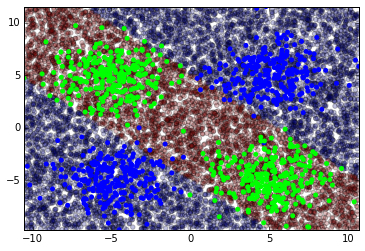

In [21]:
%pdb off
npts=10000
model=nnclass
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])

print tx.shape

cs= model.predict(tx.T); # send the transpose of X during evaluation as well...
print  np.unique(cs)
ax.scatter(tx[:,0],tx[:,1],c=cs.ravel(), alpha=.25)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
              c=list(map(lambda x:'blue' if x==1 else 'lime' if x==2 else 'r',Y)), 
              linewidth=0,s=25,alpha=1)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])

#Three class problem

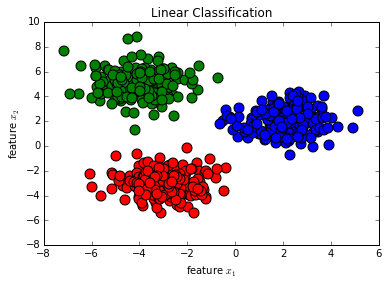

In [22]:
# Create some dummy data for training and testing

np.random.seed(seed=99)

# make some data up using Gaussian distribution...
mean1 = [-3,-3]
mean2 = [2,2]
mean3 = [-4,5]
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
nexamples=600
x1 = np.random.multivariate_normal(mean1,cov,nexamples/3)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/3)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/3)

X=np.vstack((x1,x2,x3))
Y=np.vstack((1*np.ones((nexamples/3,1)),2*np.ones((nexamples/3,1)),3*np.ones((nexamples/3,1))))

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='g', s=100)



plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class-nn.svg',format='svg')

In [23]:
print X.shape,Y.shape

(600L, 2L) (600L, 1L)


In [24]:
#Lets append a vector of dummy 1's at the end of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [25]:
ook=one_of_k(Y)

In [26]:
%pdb off
nnclass=NeuralNetwork(3,2,np.unique(Y),alpha=0.01)

Automatic pdb calling has been turned OFF


In [27]:
# %reset
# %pdb off
test_derivative(X.T,ook.T,nnclass.cost_function,nnclass.derivative_cost_function,nnclass.getnparam())

[[-0.07329263]
 [ 0.11891449]
 [ 0.04233991]
 [-0.07630899]
 [ 0.09532536]
 [ 0.0480248 ]
 [ 0.52065397]
 [ 0.52219793]
 [ 0.34397643]
 [ 0.20172705]
 [ 0.22986651]
 [ 0.33054103]
 [ 0.18696177]
 [ 0.17779256]
 [ 0.29479099]]
Computational derivatvie = [-0.073292633600008372, 0.11891449462009263, 0.042339910855115903, -0.076308989096496305, 0.095325360425224659, 0.048024798771084676, 0.52065396700218258, 0.52219793194696607, 0.3439764318047267, 0.20172704748855352, 0.22986651273981806, 0.33054102662299911, 0.18696177280785875, 0.17779255980121533, 0.29479098816898031]
Analytical derivative = (15L, 1L) [[-0.07329263  0.11891449  0.04233991 -0.07630899  0.09532536  0.0480248
   0.52065397  0.52219793  0.34397643  0.20172705  0.22986651  0.33054103
   0.18696177  0.17779256  0.29479099]]
Their difference= [[  2.72392109e-11]
 [  1.26885960e-09]
 [  1.64737252e-11]
 [ -1.39926766e-09]
 [  1.99663740e-09]
 [  3.44584916e-11]
 [ -7.29778460e-11]
 [ -7.58060281e-11]
 [ -5.09645104e-11]
 [ -7.

In [28]:
nnclass.train(X.T,Y.T) # c

# Value of Cost Function at Minimum Points [[-1.21157471]
#  [ 0.94796931]
#  [-4.32184157]
#  [-1.03109828]
#  [-2.26129239]
#  [-0.94508638]
#  [-2.42729823]
#  [ 6.69839085]
#  [-3.08516277]
#  [-5.88011564]
#  [-5.60709275]
#  [ 2.51103558]
#  [ 6.72889934]
#  [-2.50986552]
#  [-3.2739417 ]], is 0.111575654779
# Total time taken =50.49 seconds 

Calling Gradient Descent with following number of parameter=15
numiter :  20000
Value of Cost Function at Minimum Points [[ 0.82403717]
 [ 2.59461539]
 [ 1.10460956]
 [ 3.0575986 ]
 [ 0.18063638]
 [ 1.4837222 ]
 [-6.45903323]
 [-1.53539153]
 [ 3.81125132]
 [ 0.2187939 ]
 [ 6.83602774]
 [-4.90703566]
 [ 5.35819566]
 [-6.1121555 ]
 [-3.67493236]], is 0.128872102355
Total time taken =8.397 seconds 


## Let Plots the decision boundaries of the classes, using simple scatter plots... 

(10000L, 2L)
[[ 2.]
 [ 1.]
 [ 3.]
 ..., 
 [ 1.]
 [ 3.]
 [ 2.]]
[ 1.  2.  3.]


(-5.4268033365281951, 8.7674908998331276)

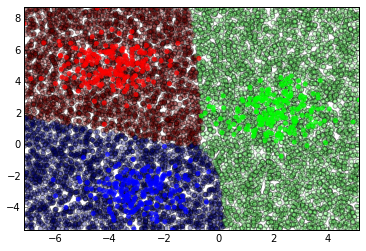

In [29]:
# %pdb off
npts=10000
model=nnclass
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])

print tx.shape
#pdb.set_trace()
cs= model.predict(tx.T);
print cs
print  np.unique(cs)
ax.scatter(tx[:,0],tx[:,1],c=cs.ravel(), alpha=.35)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
              c=list(map(lambda x:'blue' if x==1 else 'lime' if x==2 else 'r',Y)), 
              linewidth=0,s=25,alpha=0.75)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])

#Load Iris dataset and test the classifier on them...

In [30]:
#load the data set
data=pd.read_csv('./data/iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [31]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape

 Data Set Dimensions= (149L, 4L)  True Class labels dimensions (149L,)


In [32]:
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))
print X

[[ 4.9  3.   1.4  0.2  1. ]
 [ 4.7  3.2  1.3  0.2  1. ]
 [ 4.6  3.1  1.5  0.2  1. ]
 [ 5.   3.6  1.4  0.2  1. ]
 [ 5.4  3.9  1.7  0.4  1. ]
 [ 4.6  3.4  1.4  0.3  1. ]
 [ 5.   3.4  1.5  0.2  1. ]
 [ 4.4  2.9  1.4  0.2  1. ]
 [ 4.9  3.1  1.5  0.1  1. ]
 [ 5.4  3.7  1.5  0.2  1. ]
 [ 4.8  3.4  1.6  0.2  1. ]
 [ 4.8  3.   1.4  0.1  1. ]
 [ 4.3  3.   1.1  0.1  1. ]
 [ 5.8  4.   1.2  0.2  1. ]
 [ 5.7  4.4  1.5  0.4  1. ]
 [ 5.4  3.9  1.3  0.4  1. ]
 [ 5.1  3.5  1.4  0.3  1. ]
 [ 5.7  3.8  1.7  0.3  1. ]
 [ 5.1  3.8  1.5  0.3  1. ]
 [ 5.4  3.4  1.7  0.2  1. ]
 [ 5.1  3.7  1.5  0.4  1. ]
 [ 4.6  3.6  1.   0.2  1. ]
 [ 5.1  3.3  1.7  0.5  1. ]
 [ 4.8  3.4  1.9  0.2  1. ]
 [ 5.   3.   1.6  0.2  1. ]
 [ 5.   3.4  1.6  0.4  1. ]
 [ 5.2  3.5  1.5  0.2  1. ]
 [ 5.2  3.4  1.4  0.2  1. ]
 [ 4.7  3.2  1.6  0.2  1. ]
 [ 4.8  3.1  1.6  0.2  1. ]
 [ 5.4  3.4  1.5  0.4  1. ]
 [ 5.2  4.1  1.5  0.1  1. ]
 [ 5.5  4.2  1.4  0.2  1. ]
 [ 4.9  3.1  1.5  0.1  1. ]
 [ 5.   3.2  1.2  0.2  1. ]
 [ 5.5  3.5  1.3  0.

In [34]:
feat=[2,3,4]
Y=Y.reshape((len(Y),1))

In [41]:
#%pdb
nnclass=NeuralNetwork(3,3,np.unique(Y),alpha=0.01)
nnclass.train(X[:,feat].T,Y.T)

# Value of Cost Function at Minimum Points [[ 0.63320175]
#  [ 2.04650658]
#  [-6.17300513]
#  [-0.41155116]
#  [-3.17792123]
#  [ 7.2421719 ]
#  [-1.8414816 ]
#  [-2.81329784]
#  [ 6.36531528]
#  [-5.31874522]
#  [ 0.51219092]
#  [ 6.79615584]
#  [-2.81030875]
#  [-3.602798  ]
#  [ 5.12376487]
#  [-8.29311332]
#  [-0.62691273]
#  [ 5.95348495]
#  [-6.36363513]
#  [-2.88044908]
#  [-0.18659182]], is 0.248492894046
# Total time taken =9.259 seconds 

Calling Gradient Descent with following number of parameter=21
numiter :  20000
Value of Cost Function at Minimum Points [[ 1.76723633]
 [ 2.00928494]
 [ 2.12812989]
 [ 0.99629272]
 [ 1.27478036]
 [ 1.05383215]
 [ 0.56794877]
 [ 3.14904583]
 [-4.20289523]
 [ 1.50187132]
 [-0.07743879]
 [-6.12209291]
 [ 1.59095586]
 [-1.58499251]
 [-0.23894499]
 [ 2.16555175]
 [-0.57163715]
 [-1.59873965]
 [-1.41550431]
 [ 3.75076922]
 [-0.76849647]], is 1.03768657245
Total time taken =5.229 seconds 


In [42]:
def print_confusion_matrix(plabels,tlabels):
    """
        functions print the confusion matrix for the different classes
        to find the error...
        
        Input:
        -----------
        plabels: predicted labels for the classes...
        tlabels: true labels for the classes
        
        code from: http://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python
    """
    import pandas as pd
    plabels = pd.Series(plabels)
    tlabels = pd.Series(tlabels)
    
    # draw a cross tabulation...
    df_confusion = pd.crosstab(tlabels,plabels, rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    #print df_confusion
    return df_confusion

In [43]:
print_confusion_matrix((nnclass.predict(X[:,feat].T)).ravel(),Y.ravel())

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
Actual,,,,
Iris-setosa,49,0,0,49
Iris-versicolor,0,10,40,50
Iris-virginica,0,0,50,50
All,49,10,90,149


###Lets plot the decision boundaries

(10000L, 2L)
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


(0.10000000000000001, 2.5)

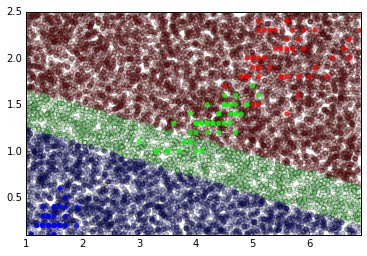

In [44]:
npts=10000
model=nnclass
ax=plt.gca()
x0spr = max(X[:,feat[0]])-min(X[:,feat[0]])
x1spr = max(X[:,feat[1]])-min(X[:,feat[1]])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,feat[0]])
tx[:,1] = tx[:,1]*x1spr + min(X[:,feat[1]])

print tx.shape
#pdb.set_trace()
cs= model.predict(tx.T);
# print cs
print  np.unique(cs)
mc=list(map(lambda x:1 if x=='Iris-setosa' else 2 if x=='Iris-versicolor' else 3,cs))
ax.scatter(tx[:,0],tx[:,1],c=mc, alpha=.25)

ax.hold(True)
ax.scatter(X[:,feat[0]],X[:,feat[1]],
               c=list(map(lambda x:'blue' if x=='Iris-setosa' else 'lime' if x=='Iris-versicolor' else 'r',Y)), 
               linewidth=0,s=25,alpha=0.8)
ax.set_xlim([min(X[:,feat[0]]), max(X[:,feat[0]])])
ax.set_ylim([min(X[:,feat[1]]), max(X[:,feat[1]])])